<a href="https://colab.research.google.com/github/i40-Tools/I40KG-Embeddings/blob/master/Community-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I40 standards landscape similarity analysis using embeddings

## Overview

In this notebook, we show the similarity analysis between Industry 4.0 Standards. 
To do so, we create embeddings about the Industry 4.0 Standards Knowledge Graph (I40KG) developed by [Grangel-Gonzales et. al.](https://www.researchgate.net/publication/318208930_The_Industry_40_Standards_Landscape_from_a_Semantic_Integration_Perspective)

The embeddings are located here: [I40 Embeddings](https://github.com/i40-Tools/I40KG-Embeddings/tree/master/logs_sto)

In [1]:
import scipy
import numpy as np
import pandas as pd
import json
from sklearn.metrics.pairwise import cosine_similarity

### In this section we show the analysis of similarity among standards belonging to the same framework

In [2]:
import json
from rdflib import Graph
SIMETRIC_MATRIX_FILE = "simetric_matrix.tsv"
ENTITIES_FILE = "entities.txt"
list_sim = []
output='result/'

g = Graph()
g.parse("sto/sto-enriched.nt", format="nt")
    
len(g) # prints 2
    
qres = g.query(
    """PREFIX owl: <http://www.w3.org/2002/07/owl#>
       PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
       PREFIX sto: <https://w3id.org/i40/sto#>
    
    select ?s where {
            ?s rdf:type sto:Standard .
    } limit 1000""")

        
#with open("embeddings/TransE/entities_to_embeddings.json",'rb') as f:
with open("embeddings/TransR/sto-enriched/entities_to_embeddings.json",'rb') as f:
    array = json.load(f)
new_dict = {}
for row in qres:
    for key,value in array.items():
        if key == "%s" % row:
            tem = key
            #print(key)
            new_dict[tem] = array[key]


with open('output_standard_same_framework.json','w') as f:
    # this would place the entire output on one line
    # use json.dump(lista_items, f, indent=4) to "pretty-print" with four spaces per indent
    json.dump(new_dict, f) 

    
#to read the file containing standards/frameworks along with their embeddings   
with open('output_standard_same_framework.json', 'r') as f:
    array = json.load(f)

### Create standard/framework list

In [3]:
list_n = [*array]
entities = "\n".join(str(x) for x in list_n)
n_ent = str(len(list_n))
with open(output+'semep/'+ENTITIES_FILE, "w") as entity:
    entity.write(n_ent+"\n"+entities)
print(len([*array]))

391


### Compare each standard/framework with all the other standards/frameworks to build cosine similarity matrix

In [4]:
result = {}
s=n_ent+"\n"
cosine_matrix = pd.DataFrame(index=list(array.keys()), columns=list(array.keys()))
cosine_matrix = cosine_matrix.fillna(0.0)
for key,value in array.items():
    for keyC,valueC in array.items():
        sim = abs(1-scipy.spatial.distance.cosine(value,valueC)) #send the values of the standards/frameworks to cosine similarity function
        sim = round(sim, 5)
        list_sim.append(sim)
        cosine_matrix.at[key, keyC] = sim

print("percentil", np.percentile(list_sim, 90))
cosine_matrix.head()

percentil 0.2386


,https://w3id.org/i40/sto#IEC_29161,https://w3id.org/i40/sto#IEC_61010_P2_S012_2016,https://w3id.org/i40/sto#ISO_26262,https://w3id.org/i40/sto#IEC_61310_P1_E2,https://w3id.org/i40/sto#NISTIR_8062,https://w3id.org/i40/sto#IEC_61000_P6_S2_2016,https://w3id.org/i40/sto#IEC_60839_P7_5,https://w3id.org/i40/sto#DIN_EN_50128,https://w3id.org/i40/sto#IEC_27018,https://w3id.org/i40/sto#DIN_SPEC_16592,...,https://w3id.org/i40/sto#IEC_60286_P5_E3,https://w3id.org/i40/sto#ISO_19770,https://w3id.org/i40/sto#ISO_27019,https://w3id.org/i40/sto#IEC_61310_P2_E2,https://w3id.org/i40/sto#RFC_768,https://w3id.org/i40/sto#IEC_29115,https://w3id.org/i40/sto#IEC_61334_P3_S1_1998,https://w3id.org/i40/sto#IEC_62453,https://w3id.org/i40/sto#ISO_20547-3,https://w3id.org/i40/sto#IEC_61850_P4_E1
https://w3id.org/i40/sto#IEC_29161,1.00000,0.03683,0.01751,0.14044,0.01019,0.17194,0.05285,0.03574,0.11844,0.10199,...,0.05920,0.12914,0.00077,0.18527,0.05519,0.05549,0.13708,0.01368,0.30431,0.14190
https://w3id.org/i40/sto#IEC_61010_P2_S012_2016,0.03683,1.00000,0.06214,0.04300,0.23308,0.12894,0.09741,0.19418,0.28699,0.24404,...,0.02051,0.04944,0.09973,0.07329,0.05431,0.12306,0.04321,0.25017,0.07777,0.18442
https://w3id.org/i40/sto#ISO_26262,0.01751,0.06214,1.00000,0.06478,0.02744,0.04587,0.05910,0.01921,0.33240,0.11982,...,0.09896,0.00893,0.05959,0.15927,0.03638,0.01469,0.23619,0.06999,0.03854,0.06161
https://w3id.org/i40/sto#IEC_61310_P1_E2,0.14044,0.04300,0.06478,1.00000,0.14136,0.12528,0.03786,0.01820,0.10082,0.18768,...,0.26806,0.23409,0.01910,0.13922,0.01013,0.20887,0.01936,0.08684,0.06946,0.04565
https://w3id.org/i40/sto#NISTIR_8062,0.01019,0.23308,0.02744,0.14136,1.00000,0.14010,0.08686,0.07892,0.19994,0.02059,...,0.20680,0.19811,0.12132,0.26043,0.17512,0.00367,0.22184,0.05535,0.08978,0.11746


### Save cosine similarity matrix with the structure SemEP need

In [5]:
f = open(output+'matrix_undirected_cosine.tsv', mode="w+")
f.write(str(cosine_matrix.shape[0])+"\n")
f.close()
cosine_matrix.to_csv(output+'semep/'+'matrix_undirected_cosine.tsv', mode='a', sep=' ',
                     index=False, header=False, float_format='%.5f')

In [ ]:
# Run SemEP from Doker (https://hub.docker.com/r/kemele/semepnode) OR (https://github.com/SDM-TIB/SemEP-Node)
#!sudo docker run -it --rm -v /media/rivas/Data1/Data-mining/KCAP-I40KG-Embeddings/I40KG-Embeddings/result/semep:/data kemele/semepnode:23-05-2018 semEP-node entities.txt matrix_undirected_cosine.tsv 0.2386

### METIS Undirected MAX based similarity graph file

In [6]:
metislines = []
nodes = {"name":[], "id":[]}
kv = 1
edges = 0
for i, row in cosine_matrix.iterrows():
    val = ""
    ix = 1
    ledges = 0
    found = False
    for k in row.keys():
        if i != k and row[k] > 0:
            val += str(ix) + " " + str(int(row[k] * 100000)) + " "
            # Only one edge is counted between two nodes, i.e., (u,v) and (v, u) edges are counted as one
            # Self links are also ignored, Notive ix>kv
            #if ix > kv:
            ledges += 1
            found = True
        ix += 1
    if found:
        # This node is connected
        metislines.append(val.strip())
        edges += ledges
        nodes["name"].append(i)
        nodes['id'].append(str(kv))
    else:
        # disconnected RDF-MTs are given 10^6 value as similarity value
        metislines.append(str(kv) + " 100000")
        edges += 1
    
    kv += 1    
nodes = pd.DataFrame(nodes)
print(edges)
nodes.head()

152488


,name,id
0,https://w3id.org/i40/sto#IEC_29161,1
1,https://w3id.org/i40/sto#IEC_61010_P2_S012_2016,2
2,https://w3id.org/i40/sto#ISO_26262,3
3,https://w3id.org/i40/sto#IEC_61310_P1_E2,4
4,https://w3id.org/i40/sto#NISTIR_8062,5


In [7]:
numedges = edges//2
numedges

76244

### Save filemetis.graph to execute METIS algorithm

In [9]:
!mkdir result/metis
ff = open(output+'metis/metis.graph', 'w+')
ff.write(str(cosine_matrix.shape[0])+" "+ str(numedges) + " 001\n")
met = [m.strip() + "\n" for m in metislines]
ff.writelines(met)
ff.close()

In [14]:
#nodes.to_csv(output+'metis/METIS_NODE-CODES.tsv', sep='\t', index=False)

In [ ]:
#Run METIS from Doker: https://hub.docker.com/r/kemele/metis
#!sudo docker run -it --rm -v /media/rivas/Data1/Data-mining/KCAP-I40KG-Embeddings/I40KG-Embeddings/result/metis:/data kemele/metis:5.1.0 gpmetis metis.graph 10

### Read results standards of 10 Partitions by METIS algorithm

In [10]:
parts = open(output+'metis/metis.graph.part.10').readlines()
parts = [p.strip() for p in parts]
print(parts)
len(parts)

['7', '5', '6', '6', '0', '0', '3', '4', '6', '0', '1', '6', '8', '0', '2', '8', '1', '7', '4', '9', '2', '7', '9', '3', '7', '2', '7', '7', '7', '0', '9', '6', '5', '0', '0', '9', '4', '2', '1', '1', '7', '7', '2', '3', '6', '3', '5', '4', '3', '5', '3', '5', '7', '3', '9', '2', '9', '8', '8', '6', '0', '0', '3', '1', '8', '7', '1', '2', '1', '1', '2', '8', '5', '1', '8', '2', '6', '2', '8', '9', '0', '4', '5', '8', '3', '5', '6', '8', '1', '0', '3', '9', '4', '1', '4', '8', '5', '6', '2', '7', '3', '9', '2', '8', '1', '6', '0', '0', '4', '2', '7', '1', '3', '6', '9', '4', '7', '3', '0', '3', '1', '4', '9', '9', '5', '4', '5', '6', '2', '8', '4', '1', '5', '3', '7', '4', '0', '5', '6', '1', '9', '1', '2', '9', '4', '5', '8', '3', '3', '9', '3', '1', '6', '4', '9', '3', '2', '0', '4', '9', '8', '0', '1', '4', '5', '4', '5', '2', '9', '6', '1', '2', '9', '5', '3', '1', '0', '5', '2', '0', '1', '3', '8', '4', '1', '8', '8', '5', '3', '2', '2', '0', '5', '2', '1', '0', '5', '1', '9', '3',

391

### Save each partition standads into a file

In [11]:
i = 0
partitions = {"0":[], "1":[], "2":[], "3":[], "4":[], "5":[], "6":[], "7":[], "8":[], "9":[]}
for p in parts:
    name = nodes.iat[i, 0]
    i +=1
    partitions[str(p)].append(name)
    
#f = open(output+'metis/metis_10_standards.graph.json', "w+")
#json.dump(partitions, f)
#f.close()
partitions

{'0': ['https://w3id.org/i40/sto#NISTIR_8062',
  'https://w3id.org/i40/sto#IEC_61000_P6_S2_2016',
  'https://w3id.org/i40/sto#DIN_SPEC_16592',
  'https://w3id.org/i40/sto#IEC_60870',
  'https://w3id.org/i40/sto#IEEE_1856',
  'https://w3id.org/i40/sto#IEC_60864_P2',
  'https://w3id.org/i40/sto#IEC_61970_P301_E6_RLV',
  'https://w3id.org/i40/sto#RFC_793',
  'https://w3id.org/i40/sto#IEC_60382_E2',
  'https://w3id.org/i40/sto#IEC_60870_P5_S2_1992',
  'https://w3id.org/i40/sto#ASME_Y1441',
  'https://w3id.org/i40/sto#IEC_61970_P452_E1',
  'https://w3id.org/i40/sto#IEC_61158',
  'https://w3id.org/i40/sto#IEC_62832',
  'https://w3id.org/i40/sto#NIST_800-144',
  'https://w3id.org/i40/sto#ISO_19941',
  'https://w3id.org/i40/sto#IEC_60848',
  'https://w3id.org/i40/sto#RFC_7643',
  'https://w3id.org/i40/sto#IEC_61690_P1_E1',
  'https://w3id.org/i40/sto#ISO_29134',
  'https://w3id.org/i40/sto#IEC_60839_P7_S5_E1',
  'https://w3id.org/i40/sto#IEC_61010_P2_S201_2017',
  'https://w3id.org/i40/sto#IEC

In [12]:
i = 0
count = 0
!mkdir result/metis/clusters
for p in partitions:
    if len(partitions[p]) == 0:
        continue
    count += len(partitions[p])
    f = open(output+'metis/clusters/standards-part' + str(i) + '.txt', 'w+')
    [f.write(l+'\n') for l in partitions[p]]
    f.close()
    i+=1
print(count)

391


## K-means Analyse 

In [13]:
vectors = []
for key,value in array.items():
    vectors.append(value)
X = np.array(vectors)

In [14]:
X[0]

array([-0.07615247, -0.10096665, -0.03142836,  0.18161559,  0.04186611,
       -0.01564454, -0.08079302,  0.01297748,  0.01316259,  0.13599125,
       -0.13968463, -0.09132826, -0.04800751, -0.11331876,  0.07745599,
        0.17687607,  0.1130693 , -0.03022075, -0.05260744,  0.14303562,
        0.11325249, -0.04057649,  0.08441427, -0.23266116,  0.01758225,
       -0.12261769,  0.09067262, -0.19260149, -0.17527272,  0.0348462 ,
       -0.12664993,  0.1664567 ,  0.070524  , -0.07689957,  0.13545817,
        0.13799509, -0.01225916,  0.06251671, -0.02384839,  0.06528848,
        0.02699034,  0.14849189, -0.2166253 , -0.07651984,  0.01406153,
        0.07643116, -0.04785866,  0.13405353, -0.07696081, -0.06494875])

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy

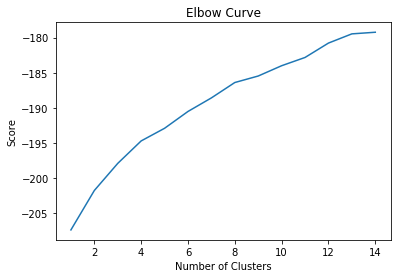

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Nc = range(1, 15)
kmeans = [KMeans(n_clusters=i) for i in Nc]
print(kmeans)
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(Nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

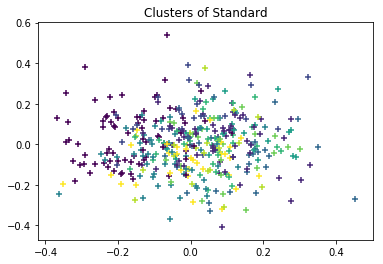

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
pca_c = pca.transform(X)
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

plt.scatter(pca_c[:, 0], pca_c[:, 1], c=kmeans.labels_, marker='+')
plt.title("Clusters of Standard")

plt.show()

### Number of standard by clsuter

In [18]:
pd.value_counts(kmeans.labels_, 0)

0    77
1    63
2    28
3    32
4    50
5    26
6    35
7    26
8    22
9    32
dtype: int64

### Save each partition standads into a file

In [19]:
list_cluster = pd.DataFrame()
list_cluster.insert(0, 'standards', list_n)
list_cluster.insert(1, 'clusters', kmeans.labels_)
#list_cluster = list_cluster.sort_values(by=['clusters'], ascending=False)

In [27]:
!mkdir result/Kmeans
!mkdir result/Kmeans/cluster
cls_0 = list_cluster.loc[list_cluster['clusters'] == 0]
cls_1 = list_cluster.loc[list_cluster['clusters'] == 1]
cls_2 = list_cluster.loc[list_cluster['clusters'] == 2]
cls_3 = list_cluster.loc[list_cluster['clusters'] == 3]
cls_4 = list_cluster.loc[list_cluster['clusters'] == 4]
cls_5 = list_cluster.loc[list_cluster['clusters'] == 5]
cls_6 = list_cluster.loc[list_cluster['clusters'] == 6]
cls_7 = list_cluster.loc[list_cluster['clusters'] == 7]
cls_8 = list_cluster.loc[list_cluster['clusters'] == 8]
cls_9 = list_cluster.loc[list_cluster['clusters'] == 9]
cls_0['standards'].to_csv(output+'Kmeans/cluster/cluster-0.txt', index=False)
cls_1['standards'].to_csv(output+'Kmeans/cluster/cluster-1.txt', index=False)
cls_2['standards'].to_csv(output+'Kmeans/cluster/cluster-2.txt', index=False)
cls_3['standards'].to_csv(output+'Kmeans/cluster/cluster-3.txt', index=False)
cls_4['standards'].to_csv(output+'Kmeans/cluster/cluster-4.txt', index=False)
cls_5['standards'].to_csv(output+'Kmeans/cluster/cluster-5.txt', index=False)
cls_6['standards'].to_csv(output+'Kmeans/cluster/cluster-6.txt', index=False)
cls_7['standards'].to_csv(output+'Kmeans/cluster/cluster-7.txt', index=False)
cls_8['standards'].to_csv(output+'Kmeans/cluster/cluster-8.txt', index=False)
cls_9['standards'].to_csv(output+'Kmeans/cluster/cluster-9.txt', index=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: The si

### Density plot of standard similarity

In [49]:
#i=0
similarity=[]
#standard_similarity = pd.DataFrame(columns=['std_1', 'std_2', 'similarity'])
for key,value in array.items():
    for keyC,valueC in array.items():
        if key != keyC:
            sim = abs(1-scipy.spatial.distance.cosine(value,valueC)) #send the values of the standards/frameworks to cosine similarity function
            similarity.append(sim)
            #standard_similarity.loc[i]=[key, keyC, sim]
            #i+=1
standard_similarity = pd.DataFrame()
standard_similarity.insert(0, 'similarity', similarity)

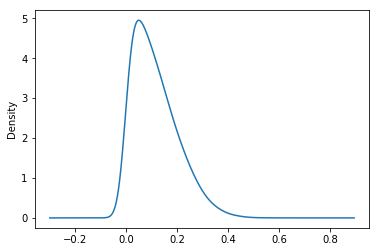

In [53]:
standard_similarity["similarity"].plot.kde(bw_method=0.3)

In [46]:
#Format required of the matrix to run clustering Measures
!mkdir result/measures
cosine_matrix.to_csv(output+'measures/matrix_undirected_cosine.tsv', mode='a',
                     index=False, header=False, float_format='%.5f')
with open(output+'measures/'+ENTITIES_FILE, "w") as entity:
    entity.write(n_ent+"\n"+entities)

In [ ]:
#Run clustering Measures from: https://github.com/SDM-TIB/korona-graph-partitioning/tree/master/utils/clusteringMeasures
#!rivas@LXZ15265:/media/rivas/Data1/Data-mining/KCAP-I40KG-Embeddings/korona-graph-partitioning/utils/clusteringMeasures$ ./cma measures/clusters measures/entities.txt measures/matrix_undirected_cosine.txt

In [475]:
#Transform these three metric to (Inv. Conductance, Norm.Modularity and Inv.Norm.Total Cut) for each algorithm

conductance = 0.903848606931
modularity = -0.003827539340
total_cut = 7934.878650000016
max_cut = sum(list_sim)

conductance = 1.0 - conductance
modularity = (modularity + 0.5)/1.5
total_cut = 1-(total_cut/max_cut)
print(conductance, total_cut, modularity)

0.096151393069 0.5579804383003377 0.33078164043999997


### Cluster evaluation in terms of prediction metrics

In [55]:
# Set data
cls_evaluation_TransD = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.166, 0.096, 0.184],
'Inv. Performance': [0.501, 0.498, 0.487],
'Inv.Norm.Total Cut': [0.594, 0.558, 0.616],
'Norm.Modularity': [0.333, 0.331, 0.344],
'Coverage': [0.170, 0.096, 0.215]
})

cls_evaluation_TransE = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.166, 0.096, 0.184],
'Inv. Performance': [0.501, 0.498, 0.487],
'Inv.Norm.Total Cut': [0.594, 0.558, 0.616],
'Norm.Modularity': [0.333, 0.331, 0.344],
'Coverage': [0.170, 0.096, 0.215]
})

cls_evaluation_TransH = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.166, 0.096, 0.184],
'Inv. Performance': [0.501, 0.498, 0.487],
'Inv.Norm.Total Cut': [0.594, 0.558, 0.616],
'Norm.Modularity': [0.333, 0.331, 0.344],
'Coverage': [0.170, 0.096, 0.215]
})

cls_evaluation_TransR = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.166, 0.096, 0.184],
'Inv. Performance': [0.501, 0.498, 0.487],
'Inv.Norm.Total Cut': [0.594, 0.558, 0.616],
'Norm.Modularity': [0.333, 0.331, 0.344],
'Coverage': [0.170, 0.096, 0.215]
})

In [56]:
def radar_plot(position, df):
    # Libraries
    import matplotlib.pyplot as plt
    from math import pi

    # ------- PART 1: Create background

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(position, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, fontsize='medium', rotation=20)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5], ['0', '0.1', '0.2', '0.3', '0.4', '0.5'], color="grey", size=7)
    plt.ylim(0,0.65)

    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, np.pi):
            label.set_horizontalalignment('center')
        elif 0 < angle < np.pi:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')

    # ------- PART 2: Add plots

    # Plot each individual = each line of the data
    # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

    # Algorithm1
    values=df.loc[0].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label="SemEP")
    ax.fill(angles, values, 'b', alpha=0.1)

    # Algorithm2
    values=df.loc[1].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label="Metis")
    ax.fill(angles, values, 'r', alpha=0.1)

    # Algorithm3
    values=df.loc[2].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label="Kmeans")
    ax.fill(angles, values, 'r', alpha=0.1)
    

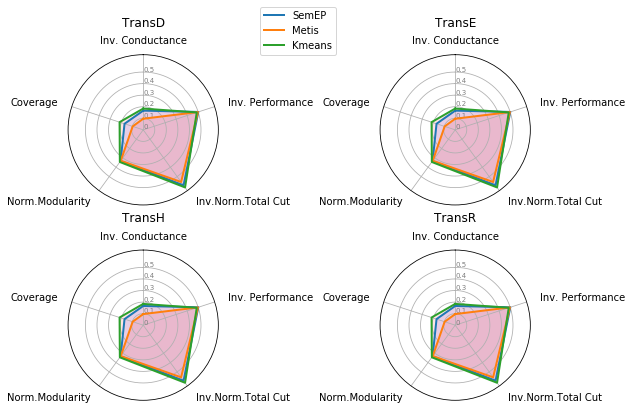

In [57]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# plot with various axes scales
plt.figure(1) #figsize=(20, 10)

# TransD
radar_plot(221,cls_evaluation_TransD)
plt.title('TransD', y=1.15)

# TransE
radar_plot(222,cls_evaluation_TransE)
plt.title('TransE', y=1.15)

# TransH
radar_plot(223,cls_evaluation_TransH)
plt.title('TransH', y=1.15)

# TransR
radar_plot(224,cls_evaluation_TransR)
plt.title('TransR', y=1.15)

# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
#plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=1.2, bottom=0.0, left=0.0, right=1.3, hspace=0.30,
                    wspace=0.25)
plt.legend(loc = (-0.80, 2.3), ncol=1, fontsize='medium')

plt.savefig("Measure of standards clusters based on Trans Family", format='pdf', bbox_inches = 'tight')
#plt.show()